### **Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos (Portafolio Análisis)**

**Inteligencia artificial avanzada para la ciencia de datos**

Daniel Salvador Cázares García A01197517

Agosto de 2022

### Librerías

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EXPLORACIÓN DE LA BASE DE DATOS

## Base de datos

**Base de datos:** [Data Science Jobs Salaries (Kaggle)](#https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

In [295]:
df = pd.read_csv('ds_salaries.csv', index_col=0) # Dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [296]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


## Variables y significado

### Cantidad de datos y variables presentes

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Se tiene un total de 607 registros y 11 variables.

**Variables presentes**

1. **work_year**: Año en que se pagó el salario.
2. **experience_level**: Nivel de experiencia: EN Entry-level/Junior, MI Mid-level/Intermediate, SE Senior-level/Experto, EX Executive-level/Director
3. **employment_type**: Tipo de empleo: PT Tiempo parcial, FT Tiempo completo, CT Contrato, FL Freelance
4. **job_title**: Rol trabajado durante el año
5. **salary**: Monto total del salario bruto pagado (antes de impuestos)
6. **salary_currency**: Moneda del salario pagado
7. **salaryinusd**: Salario en USD
8. **employee_residence**: País de residencia del empleado durante el año laboral
9. **remote_ratio**: Cantidad de trabajo realizado de forma remota: 0 Sin trabajo remoto (< 20 %), 50 Parcialmente remoto, 100 Totalmente remoto (> 80 %)
10. **company_location**: País dondse se ubica la oficina principal del empleador
11. **company_size**: Número promedio de personas que trabajaron para la empresa durante el año: S menos de 50 empleados (pequeño) M 50 a 250 empleados (mediano) L más de 250 empleados (grande)

### Clasificación de variables por tipo y escala

**Variables presentes**

1. **work_year**: cuantitativa (númerica) | discreta
2. **experience_level**: cualitativa (categórica) | ordinal
3. **employment_type**: cualitativa (categórica) | nominal
4. **job_title**: cualitativa (categórica) | nominal
5. **salary**: cuantitativa (númerica) | discreta
6. **salary_currency**: cualitativa (categórica) | nominal
7. **salaryinusd**: cuantitativa (númerica) | discreta
8. **employee_residence**: cualitativa (categórica) | nominal
9. **remote_ratio**: cualitativa (categórica) | ordinal
10. **company_location**: cualitativa (categórica) | nominal
11. **company_size**: cualitativa (categórica) | ordinal

In [298]:
v_cual = ["work_year","experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "remote_ratio", "company_location", "company_size"]
v_cuant = ["salary", "salary_in_usd"]

## Exploración de la base de datos

### Medidas estadísticas

#### Variables cuantitativas

##### Medidas de tendencia central
Promedio, mediana y moda 

In [299]:
pd.DataFrame(zip(df[v_cuant].mean(), df[v_cuant].median()), columns =['promedio', 'mediana'], index=v_cuant)

,promedio,mediana
salary,324000.062603,115000.0
salary_in_usd,112297.869852,101570.0


In [300]:
df[v_cuant].mode()

,salary,salary_in_usd
0,80000,100000.0
1,100000,NaN


##### Medidas de dispersión
Rango máximo - mínimo, varianza, desviación estándar

In [301]:
pd.DataFrame(zip(df[v_cuant].min(), df[v_cuant].max(), df[v_cuant].var(), df[v_cuant].std()), columns =['min', 'max', 'varianza', 'std'], index=v_cuant)

,min,max,varianza,std
salary,4000,30400000,2.385040e+12,1.544357e+06
salary_in_usd,2859,600000,5.034933e+09,7.095726e+04


##### Variables cualitativas

Tabla de distribución de frecuencia

In [302]:
pd.crosstab(df['work_year'],  'count')

col_0,count
work_year,
2020,72
2021,217
2022,318


In [303]:
pd.crosstab(df['experience_level'],  'count')

col_0,count
experience_level,
EN,88
EX,26
MI,213
SE,280


In [304]:
pd.crosstab(df['employment_type'],  'count')

col_0,count
employment_type,
CT,5
FL,4
FT,588
PT,10


In [305]:
pd.crosstab(df['job_title'],  'count')

col_0,count
job_title,
3D Computer Vision Researcher,1
AI Scientist,7
Analytics Engineer,4
Applied Data Scientist,5
Applied Machine Learning Scientist,4
BI Data Analyst,6
Big Data Architect,1
Big Data Engineer,8
Business Data Analyst,5


In [306]:
pd.crosstab(df['salary_currency'],  'count')

col_0,count
salary_currency,
AUD,2
BRL,2
CAD,18
CHF,1
CLP,1
CNY,2
DKK,2
EUR,95
GBP,44


In [307]:
pd.crosstab(df['employee_residence'],  'count')

col_0,count
employee_residence,
AE,3
AR,1
AT,3
AU,3
BE,2
BG,1
BO,1
BR,6
CA,29


In [308]:
pd.crosstab(df['remote_ratio'],  'count')

col_0,count
remote_ratio,
0,127
50,99
100,381


In [309]:
pd.crosstab(df['company_location'],  'count')

col_0,count
company_location,
AE,3
AS,1
AT,4
AU,3
BE,2
BR,3
CA,30
CH,2
CL,1


In [310]:
pd.crosstab(df['company_size'],  'count')

col_0,count
company_size,
L,198
M,326
S,83


Moda

In [311]:
df[v_cual].mode()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,USD,US,100,US,M


### Visualización de datos

#### Variables cuantitativas

##### Medidas de posición
Boxplot, cuartiles, outliers

[Text(0.5, 1.0, 'salary_in_usd')]

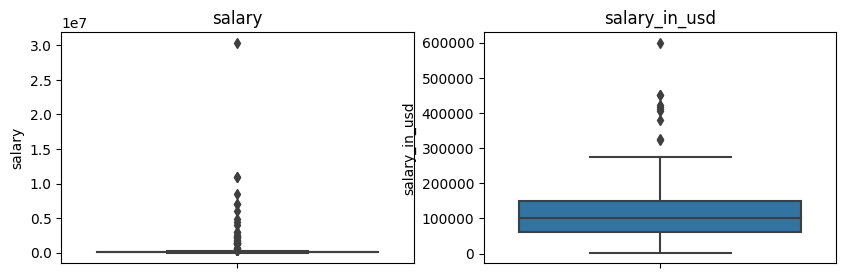

In [312]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(ax=axes[0], y=df['salary']).set(title='salary')
sns.boxplot(y=df['salary_in_usd']).set(title='salary_in_usd')

Se puede observar que cerca del 50% de los salarios se encuentran en un rango de $60,000 a $150,00 USD, con varios outliers que superan de forma notable el máximo del diagrama de caja, que se encuentra en cerca de $300,000

##### Histogramas
Análisis de distribución de los datos y forma

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

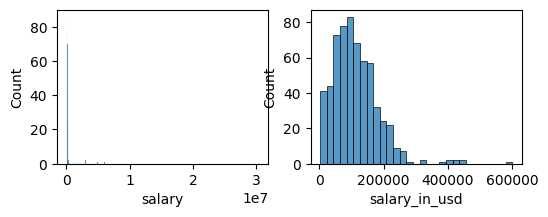

In [313]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2))
sns.histplot(df['salary'], ax=axes[0])
sns.histplot(df['salary_in_usd'], ax=axes[1])

La gráfica de distribución para los salarios en USD tiene una forma asimetrica, donde existe un marcado sesgo a la derecha y la mayoría de los salarios se encuentran al rededor de la media salarial que es de aprox. $112,000 USD.

#### Variables categóricas

Distribución de los datos (diagramas de barras y pastel)

**work_year**

<AxesSubplot:ylabel='work_year'>

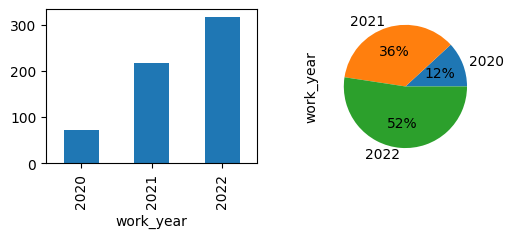

In [314]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2))
df.groupby(['work_year'])['work_year'].count().plot.bar(ax=axes[0])
df.groupby(['work_year'])['work_year'].count().plot.pie(autopct='%.0f%%')

Más del 50% de los registros son de 2022

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

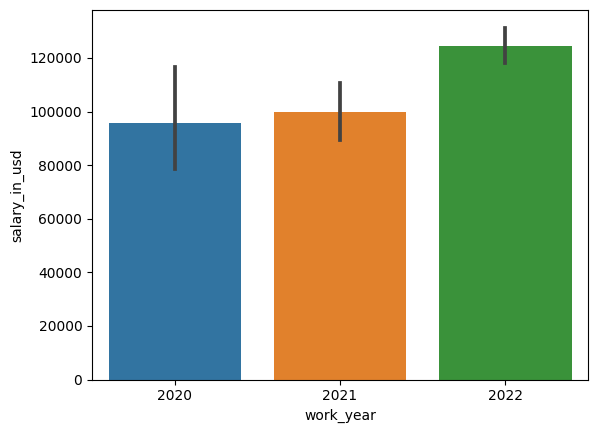

In [315]:
sns.barplot(x = df["work_year"], y = df["salary_in_usd"])

**experience_level**

<AxesSubplot:ylabel='experience_level'>

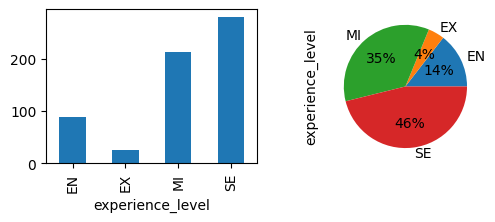

In [316]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2))
df.groupby(['experience_level'])['experience_level'].count().plot.bar(ax=axes[0])
df.groupby(['experience_level'])['experience_level'].count().plot.pie(autopct='%.0f%%')

En las gráficas se puede ver que la mayor parte de los trabajos son posiciones intermedias y senior

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

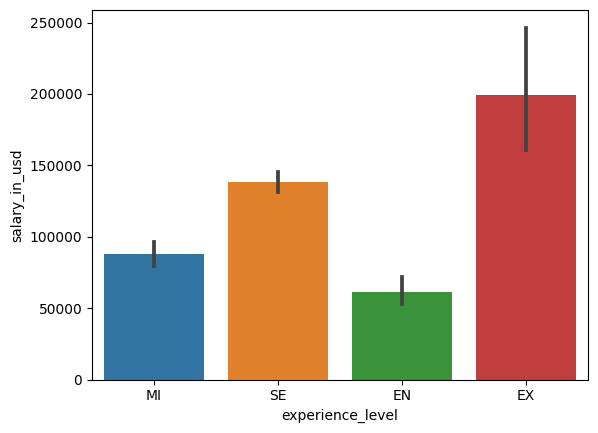

In [317]:
sns.barplot(x = df["experience_level"], y = df["salary_in_usd"])

Como sería de esperarse, los puestos senior y ejecutivos pagan más.

**employment_type**

<AxesSubplot:ylabel='employment_type'>

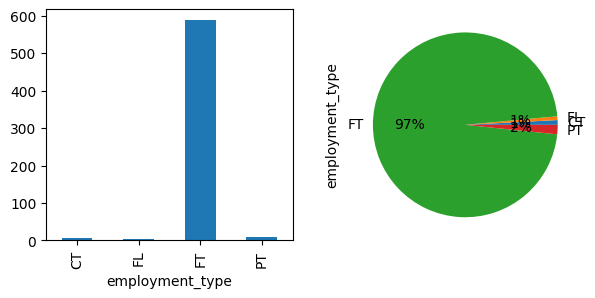

In [318]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
df.groupby(['employment_type'])['employment_type'].count().plot.bar(ax=axes[0])
df.groupby(['employment_type'])['employment_type'].count().plot.pie(autopct='%.0f%%')

Con gran diferencia, los trabajos de tiempo completo son los más comunes en comparación al resto. (97%)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

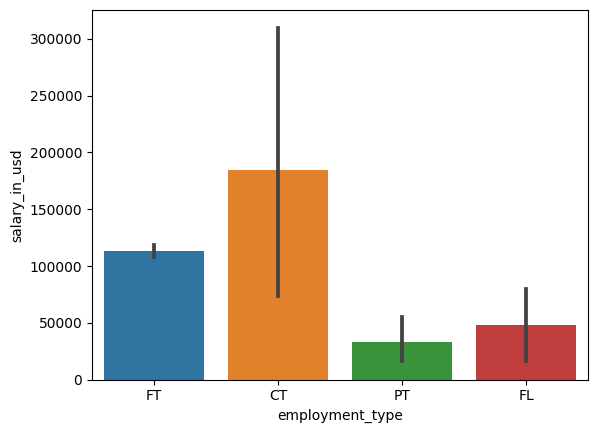

In [319]:
sns.barplot(x = df["employment_type"], y = df["salary_in_usd"])

**job_title**

<AxesSubplot:xlabel='job_title'>

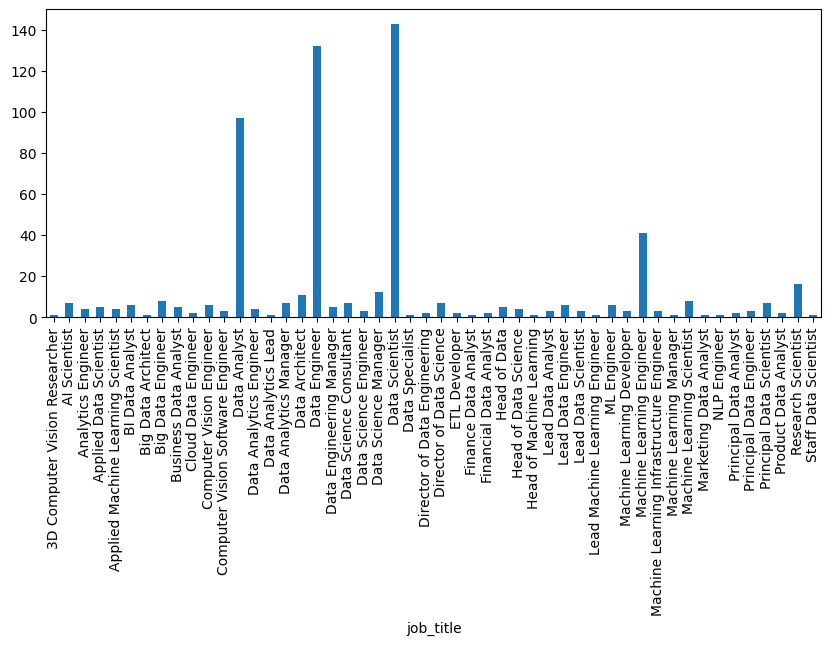

In [320]:
df.groupby(['job_title'])['job_title'].count().plot.bar(figsize=(10,4))

[Text(0, 0, 'Data Scientist'),
 Text(1, 0, 'Machine Learning Scientist'),
 Text(2, 0, 'Big Data Engineer'),
 Text(3, 0, 'Product Data Analyst'),
 Text(4, 0, 'Machine Learning Engineer'),
 Text(5, 0, 'Data Analyst'),
 Text(6, 0, 'Lead Data Scientist'),
 Text(7, 0, 'Business Data Analyst'),
 Text(8, 0, 'Lead Data Engineer'),
 Text(9, 0, 'Lead Data Analyst'),
 Text(10, 0, 'Data Engineer'),
 Text(11, 0, 'Data Science Consultant'),
 Text(12, 0, 'BI Data Analyst'),
 Text(13, 0, 'Director of Data Science'),
 Text(14, 0, 'Research Scientist'),
 Text(15, 0, 'Machine Learning Manager'),
 Text(16, 0, 'Data Engineering Manager'),
 Text(17, 0, 'Machine Learning Infrastructure Engineer'),
 Text(18, 0, 'ML Engineer'),
 Text(19, 0, 'AI Scientist'),
 Text(20, 0, 'Computer Vision Engineer'),
 Text(21, 0, 'Principal Data Scientist'),
 Text(22, 0, 'Data Science Manager'),
 Text(23, 0, 'Head of Data'),
 Text(24, 0, '3D Computer Vision Researcher'),
 Text(25, 0, 'Data Analytics Engineer'),
 Text(26, 0, 'App

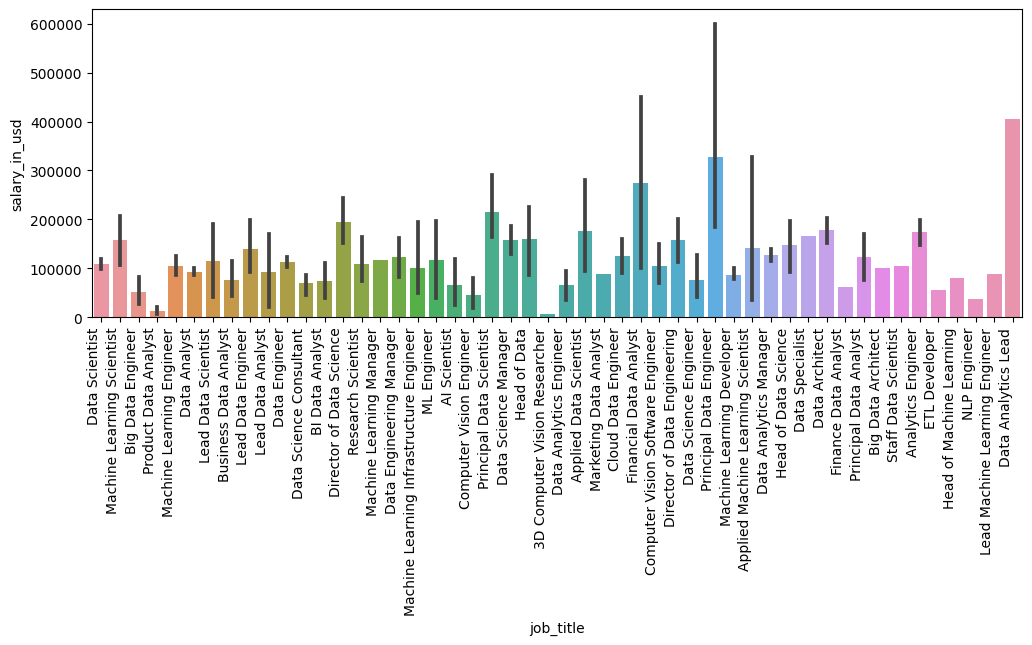

In [321]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x = df["job_title"], y = df["salary_in_usd"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

**salary_currency**

<AxesSubplot:ylabel='salary_currency'>

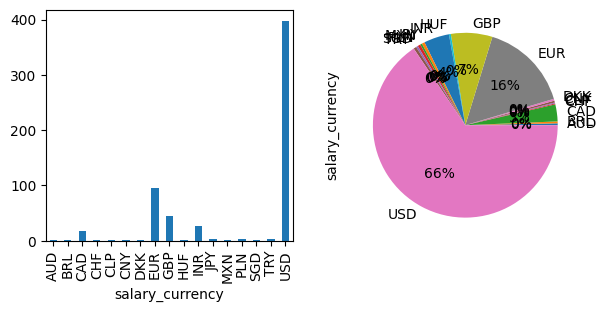

In [322]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
df.groupby(['salary_currency'])['salary_currency'].count().plot.bar(ax=axes[0])
df.groupby(['salary_currency'])['salary_currency'].count().plot.pie(autopct='%.0f%%')

**employee_residence**

<AxesSubplot:xlabel='employee_residence'>

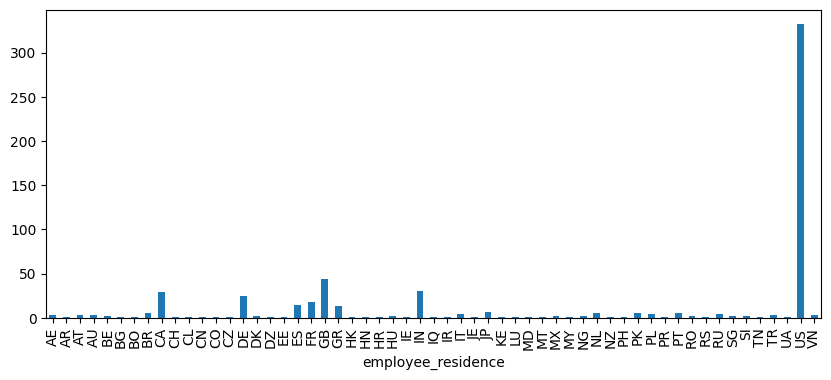

In [323]:
df.groupby(['employee_residence'])['employee_residence'].count().plot.bar(figsize=(10,4))

[Text(0, 0, 'DE'),
 Text(1, 0, 'JP'),
 Text(2, 0, 'GB'),
 Text(3, 0, 'HN'),
 Text(4, 0, 'US'),
 Text(5, 0, 'HU'),
 Text(6, 0, 'NZ'),
 Text(7, 0, 'FR'),
 Text(8, 0, 'IN'),
 Text(9, 0, 'PK'),
 Text(10, 0, 'PL'),
 Text(11, 0, 'PT'),
 Text(12, 0, 'CN'),
 Text(13, 0, 'GR'),
 Text(14, 0, 'AE'),
 Text(15, 0, 'NL'),
 Text(16, 0, 'MX'),
 Text(17, 0, 'CA'),
 Text(18, 0, 'AT'),
 Text(19, 0, 'NG'),
 Text(20, 0, 'PH'),
 Text(21, 0, 'ES'),
 Text(22, 0, 'DK'),
 Text(23, 0, 'RU'),
 Text(24, 0, 'IT'),
 Text(25, 0, 'HR'),
 Text(26, 0, 'BG'),
 Text(27, 0, 'SG'),
 Text(28, 0, 'BR'),
 Text(29, 0, 'IQ'),
 Text(30, 0, 'VN'),
 Text(31, 0, 'BE'),
 Text(32, 0, 'UA'),
 Text(33, 0, 'MT'),
 Text(34, 0, 'CL'),
 Text(35, 0, 'RO'),
 Text(36, 0, 'IR'),
 Text(37, 0, 'CO'),
 Text(38, 0, 'MD'),
 Text(39, 0, 'KE'),
 Text(40, 0, 'SI'),
 Text(41, 0, 'HK'),
 Text(42, 0, 'TR'),
 Text(43, 0, 'RS'),
 Text(44, 0, 'PR'),
 Text(45, 0, 'LU'),
 Text(46, 0, 'JE'),
 Text(47, 0, 'CZ'),
 Text(48, 0, 'AR'),
 Text(49, 0, 'DZ'),
 Text(50, 

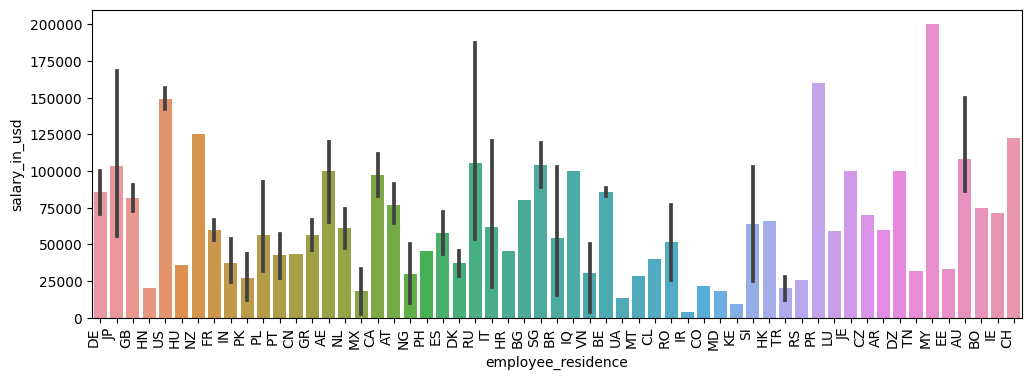

In [324]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x = df["employee_residence"], y = df["salary_in_usd"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


**remote_ratio**

<AxesSubplot:ylabel='remote_ratio'>

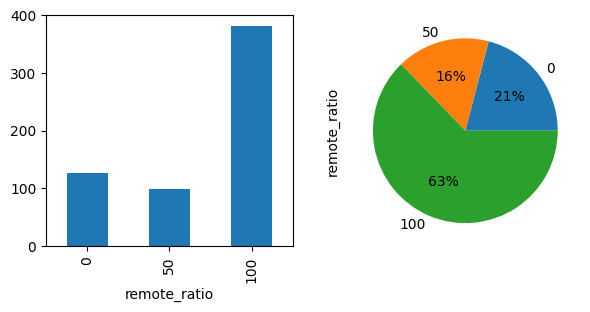

In [325]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
df.groupby(['remote_ratio'])['remote_ratio'].count().plot.bar(ax=axes[0])
df.groupby(['remote_ratio'])['remote_ratio'].count().plot.pie(autopct='%.0f%%')

Por mucha diferencia, los trabajos completamente remotos son los más comunes (63%)

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

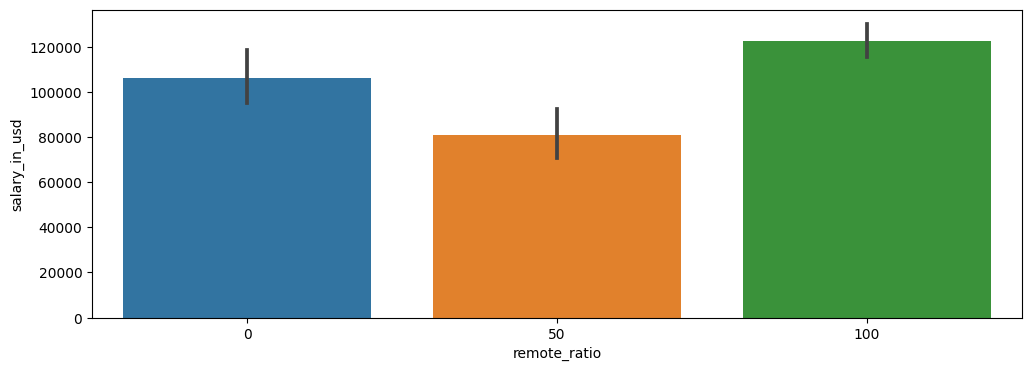

In [326]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x = df["remote_ratio"], y = df["salary_in_usd"])

**company_location**

<AxesSubplot:xlabel='company_location'>

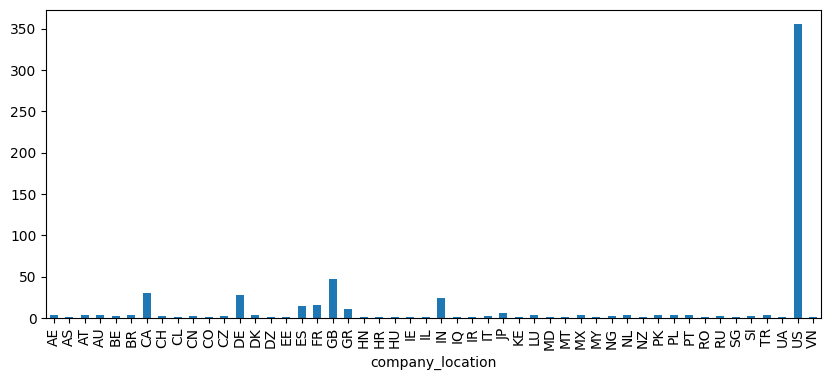

In [327]:
df.groupby(['company_location'])['company_location'].count().plot.bar(figsize=(10,4))

**company_size**

<AxesSubplot:ylabel='company_size'>

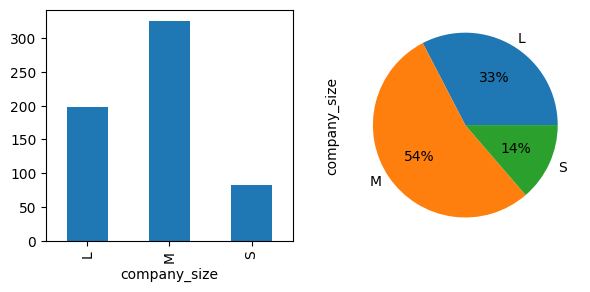

In [328]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
df.groupby(['company_size'])['company_size'].count().plot.bar(ax=axes[0])
df.groupby(['company_size'])['company_size'].count().plot.pie(autopct='%.0f%%')

Se puede observar que el 86% de los puestos de trabajo en ciencia de datos son en compañías medianas o grandes.

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

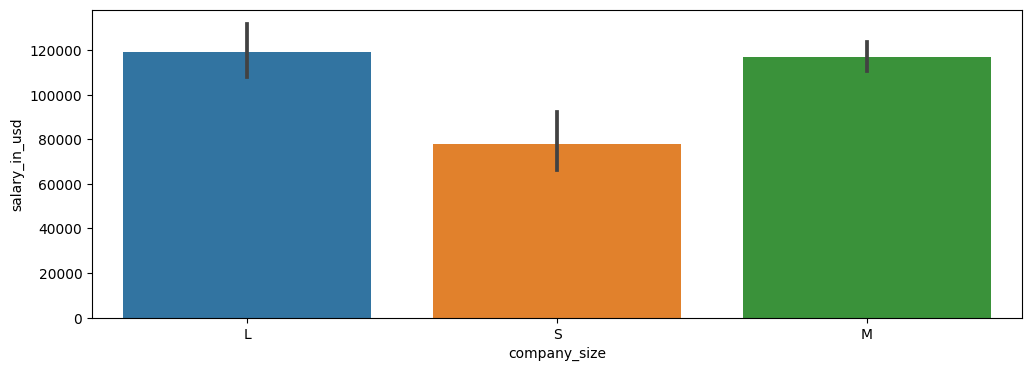

In [329]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x = df["company_size"], y = df["salary_in_usd"])

### Problemas de calidad de datos

**Registros duplicados**

In [330]:
df.duplicated(keep=False).sum()

71

In [331]:
df[df.duplicated(keep=False)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
119,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
303,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
587,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
588,2022,SE,FT,Data Analyst,99000,USD,99000,US,0,US,M
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M


Existen 71 duplicados. Sin embargo, debido a que no se cuenta con datos más especificos, esta repetición no es un motivo suficiente para eliminar duplicados, pues existe la posibilidad de que existan puestos de trabajo con caracteristicas similares.

**Valores faltantes**

In [332]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No existen valores faltantes o nulos.

**Outliers**

Para encontrar outliers se utilizo el rango intercuartil (IQR). Esto solamente se realizo para la variable `salary_in_usd`, pues no tendría sentido hacerlo para cantidades de dinero que se encuentran en diferentes tipos de moneda.

In [333]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
up = Q3 + 1.5*IQR
lo = Q1 - 1.5*IQR

outliers = df.loc[(df['salary_in_usd'] < lo) | (df['salary_in_usd'] > up), 'salary_in_usd']
print("Num outliers: ", len(outliers))
print("Min outlier: ", outliers.min())
print("Min outlier: ", outliers.max())
print("Ouliers: ", sorted(outliers))

Num outliers:  10
Min outlier:  324000
Min outlier:  600000
Ouliers:  [324000, 325000, 380000, 405000, 412000, 416000, 423000, 450000, 450000, 600000]


Se puede observar que existen 10 outliers o valores atípicos para el salario en USD. Llama la atención que solamente existen outliers por encima de la mediana. Estos valores se encuentran muy lejanos de la mediana del salario de $101,570 USD, por lo que es posible que esten impactando de manera negativa a los cálculos. El valor máximo se encuentra incluso muy por encima de los otros ouliers, por lo que es posible que se trate de un error.

## Preparación de los datos

### Selección del conjunto de datos a utilizar

#### Selección de variables

**Variables objetivo**

La variable de interés es `salary_in_usd`, pues se busca analizar el efecto que tienen las diferentes variables sobre el salario de las personas que trabajan en Data Science.

**Variables incluidas y excluidas**

La mayoría de las variables presentes pueden ser relevantes para el análisis de información. Sin embargo, existen 2 variables: `salary` y `salary_currency`, que pueden ser eliminadas. Estas no aportan información útil para hacer comparaciones, pues son sueldos en diferentes tipos de moneda. Además, ya se cuenta con una variable de salario en dolares, por lo que no son necesarias para hacer alguna otra conversión.

In [334]:
df.drop(df[['salary','salary_currency']], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 47.4+ KB


#### Manejo de datos categóricos

#### Recorte de datos (faltantes, duplicados, etc)

Como se pudo observar anteriormente, no existen datos faltantes.

In [335]:
df.isna().sum().sum()

0

En cuanto a los datos duplicados, si existen 71 registros repetidos. Sin embargo, no se tiene información suficiente para descartarlos,  ya que pueden existir puestos de trabajo con caracteristicas muy similares o incluso varias personas que tengan un mismo puesto en la misma compañía.

In [336]:
df.duplicated(keep=False).sum()

71

#### Manejo de datos atípicos

Como se pudo observar anteriormente, existen varios outliers para variable `salary_in_usd`. Además, la distribución de los datos tiene un grado de sesgo causado por dichos outliers, que son salarios muy elevados en comparación al resto. 

Para manejar estos datos atípicos, se decidio utilizar el rango intercuartil (IQR) y realizar una **imputación**, para sustituir los valores atípicos por la mediana y no tener que eliminar dichos registros.

In [337]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
up = Q3 + 1.5*IQR
lo = Q1 - 1.5*IQR

median = df['salary_in_usd'].median()
df['salary_in_usd'] = np.where((df['salary_in_usd'] < lo) | (df['salary_in_usd'] > up), median, df['salary_in_usd'])

### Transformación de los datos

#### Escalamiento y normalización

El alcance de este trabajo es principalmente explorar, visualizar y analizar los datos, por lo que no hay la necesidad de realizar un escalamiento o normalización. Sin embargo, si se estuviera realizando un modelo de inteligencia artificial, este proceso si sería necesario para que el modelo no se viera impactado por la escala de las variables de entrada.

#### Construcción de atributos

Existen algunas variables categoricas que se pueden expresar de más de una forma. Para esto, puede ser útil crear nuevos atributos. Aquellos atributos categoricos que son expresados de forma númerica, pueden ser traducidos a String para la visualización de los datos. Del mismo modo y de forma contraria, atributos categoricos que son Strings, pueden ser traducidos a números, los cuales podrían ser utilizados en caso de que se entrene un modelo de Machine Learning.

**experience_level**

Se creo la columna `experience_level_num` y se hicieron las siguientes conversiones:
* EN → 0
* MI → 1
* SE → 2
* EX → 3

In [338]:
df['experience_level_num'] = df['experience_level'] 
df['experience_level_num'].replace(['EN','MI','SE', 'EX'], [0, 1, 2, 3], inplace = True)

**employment_type**

Se creo la columna `employment_type_num` y se hicieron las siguientes conversiones:
* PT → 0
* FT → 1
* CT → 2
* FL → 3

In [339]:
df['employment_type_num'] = df['employment_type'] 
df['employment_type_num'].replace(['PT','FT','CT', 'FL'], [0, 1, 2, 3], inplace = True)

**remote_ratio**

Se creo la columna `remote_ratio_cat` y se hicieron las siguientes conversiones:
* 0 → Remote
* 50 → Hybrid
* 100 → On-site

In [340]:
df['remote_ratio_cat'] = df['remote_ratio'] 
df['remote_ratio_cat'].replace([0, 50, 100], ['Remote', 'Hybrid', 'On-site'], inplace = True)

**company_size**

Se creo la columna `company_size_num` y se hicieron las siguientes conversiones:
* S → 0
* M → 1
* L → 2

In [341]:
df['company_size_num'] = df['company_size'] 
df['company_size_num'].replace(['S','M','L'], [0, 1, 2], inplace = True)

## Reformateo / reestructura de datos

Para facilitar el análisis e interpretación de la información de forma visual, se modifico el formato en que se presental  algunas de las variables categóricas:
* **experience_level**: Modificar las categorías abreviadas (EN, MI, SE, EX) por sus nombres completos (Entry, Mid, Senior, Executive)
* **employment_type**: Modificar las categorías abreviadas (PT, FT, CT, FL) por sus nombres completos (Part-time, Full-time, Contract, Freelance)

In [342]:
df['experience_level'].replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
df['employment_type'].replace(['PT','FT','CT', 'FL'], ['Part-time', 'Full-time', 'Contract', 'Freelance'], inplace = True)

# 2. ANÁLISIS DE DATOS Y PREGUNTAS GUÍA

#### ¿Cuál es el salario al que pueda aspirar un analista de datos?

Para poder responder esta pregunta se pueden utilizar los rangos intercuartiles, así como observar la distribución de frecuencia para el año en curso

Salario min:  10000.0
Salario Q25:  81666.0
Salario Q75:  158800.0
Salario max:  266400.0
Salario promedio:  121992.7924528302


<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

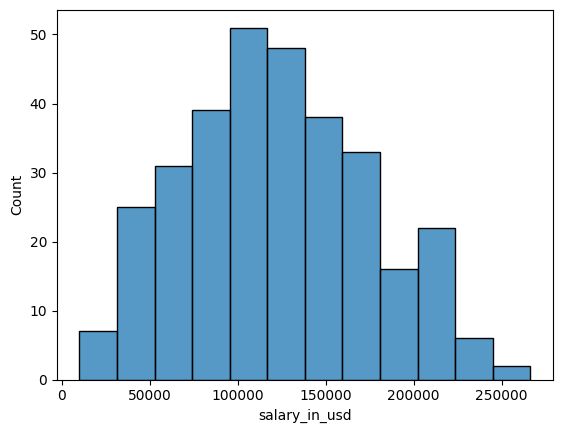

In [343]:
curSalary = df[df['work_year'] == 2022]['salary_in_usd']
print("Salario min: ", curSalary.min())
print("Salario Q25: ", curSalary.quantile(0.25))
print("Salario Q75: ", curSalary.quantile(0.75))
print("Salario max: ", curSalary.max())
print("Salario promedio: ", curSalary.mean())
sns.histplot(curSalary)

Se puede ver que el 50% de los salarios se encuentran en un rango de $81,666 a $158,800, por lo que  se podría decir que por lo menos el 50% de los analista de datos pueden aspirar a un salario cercano o dentro de este rango. 

Hay que tomar en cuenta que también existen salarios por debajo y encima de este rango, sin embargo, la frecuencia es menor. Es importante recordar que en este caso no se está tomando en cuenta otras variables que pueden influir grandemente en el salario.

#### ¿En qué países se ofrecen mejores salarios?

Para poder responder esta pregunta se puede calcular el salario promedio por país y observar aquellos en los que es mayor.

company_location
JP    114127.333333
IL    119059.000000
NZ    125000.000000
US    135127.656338
RU    157500.000000
Name: salary_in_usd, dtype: float64


[Text(0, 0, 'L'), Text(1, 0, 'S'), Text(2, 0, 'M')]

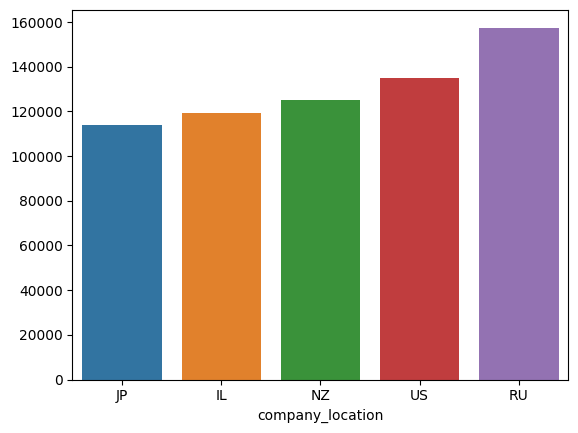

In [344]:
avg_sal_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values()[-5:]

print(avg_sal_country)

sns.barplot(x=avg_sal_country.index, y=avg_sal_country.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

Los países que en promedio pagan mejor a los trabajadores de Data Science son Japón (JP), Israel (IL), Nueva Zelanda (NZ), Estados Unidos (US) y Rusia (RU). En promedio, estos países pagan un sueldo arriba de $114,127 USD al año (El promedio a nivel mundial es $121,992)

#### ¿Se han incrementado los salarios a lo largo del tiempo?

work_year
2020     83558.972222
2021     93020.981567
2022    121992.792453
Name: salary_in_usd, dtype: float64


([<matplotlib.axis.XTick at 0x24f12d2b7f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

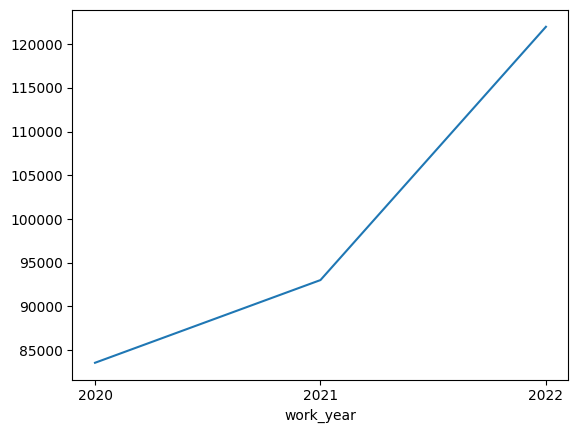

In [345]:
avg_sal_year = df.groupby('work_year')['salary_in_usd'].mean()

print(avg_sal_year)

sns.lineplot(x=avg_sal_year.index, y=avg_sal_year.values)
plt.xticks([2020,2021,2022])

Los salarios promedio aumentaron de aproximadamente $83K en 2020 a $93K en 2021. El aumento más considerable se dio en 2022, pues hubo un aumento a un promedio de $121K. Esto muestra una tendencia positiva y que además, el valor de los trabajos en Ciencia de datos sigue aumentando con los años.

#### ¿Influye el nivel de experiencia en el salario?

experience_level
Entry         61643.318182
Executive    150979.730769
Mid           83215.352113
Senior       135430.542857
Name: salary_in_usd, dtype: float64


<AxesSubplot:xlabel='salary_in_usd', ylabel='experience_level'>

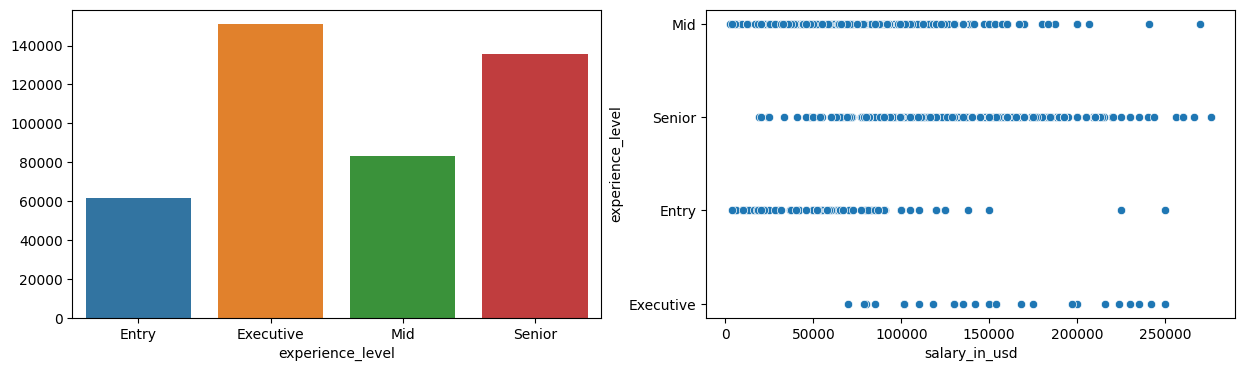

In [346]:
avg_sal_xp = df.groupby('experience_level')['salary_in_usd'].mean()

print(avg_sal_xp)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=avg_sal_xp.index, y=avg_sal_xp.values, ax=axes[0])
sns.scatterplot(data = df, x = "salary_in_usd", y = "experience_level", ax=axes[1])

De forma general y como es de esperarse se puede observar que aquellos con un nivel de experiencia de entrada o medio tienen un menor salario, que aquellas personas con un empleo en el que necesitan experiencia ejecutiva o senior. Algo que llama la atención es que existen puestos de trabajo senior que ganan igual o incluso mejor que posiciones ejecutivas. Es importante mencionar, que para poder hacer un análisis más a fondo de esta información, sería necesario hacer la distinción por puesto de trabajo o incluso dentro de un mismo país o compañía. 

#### ¿Influye el tamaño de la compañía en el salario que puede ofrecer a un analista de datos?

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

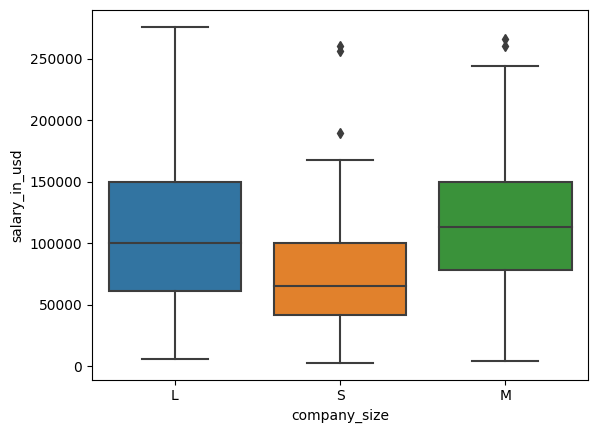

In [347]:
sns.boxplot(y=df['salary_in_usd'], x=df['company_size'])

Los trabajos de ciencia de datos en empresas de mayor tamaño tienen un salario por lo general más alto que las empresas medianas y pequeñas. Sin embargo, llama la atención que el sueldo de las empreas medianas tampoco se encuentra tan lejos del que ofrecen las grandes. También hay que recordar que esto no implica necesariamente que las empresas más grandes siempre den un salario más alto, pues dentro de una empresa puede haber diferentes salarios.

#### ¿Qué tipo de contrato (parcial, tiempo completo, etc) ofrece mejores salarios?

employment_type
Contract     121689.000000
Freelance     48000.000000
Full-time    108612.852041
Part-time     33070.500000
Name: salary_in_usd, dtype: float64


<AxesSubplot:xlabel='employment_type'>

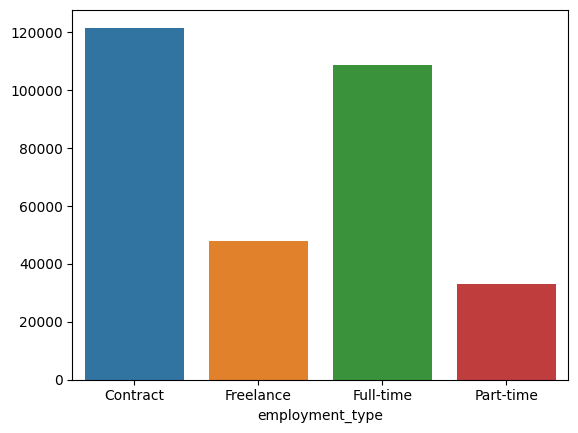

In [348]:
avg_sal_contract = df.groupby('employment_type')['salary_in_usd'].mean()

print(avg_sal_contract)

sns.barplot(x=avg_sal_contract.index, y=avg_sal_contract.values)

En cuanto a las horas de trabajo, y como sería de suponerse, los trabajos de tiempo completo tienen un salario promedio mucho más alto que aquellos de medio tiempo ($108,612 vs. $33,070). En cuanto al tipo de empleo, aquellas personas que trabajan bajo un contrato tienen un salario promedio mayor al doble del salario de las personas que trabajan en freelance ($121,689 vs. $48,000)